# Pendahuluan
## Deskripsi Singkat Proyek
Proyek ini bertujuan untuk menganalisis tingkat perpindahan pelanggan (customer churn) dalam suatu perusahaan atau layanan. Dengan menggunakan dataset yang mencakup berbagai atribut pelanggan, proyek ini akan fokus pada pemahaman perilaku churn, identifikasi faktor-faktor yang mempengaruhi churn, dan membangun model prediksi untuk mengantisipasi potensi churn di masa depan. Analisis ini diharapkan akan membantu perusahaan dalam mengoptimalkan strategi retensi pelanggan dan meningkatkan kualitas layanan untuk meminimalkan tingkat churn.
## Business Questions
- Berapa tingkat churn pelanggan saat ini?
- Faktor apa yang paling berpengaruh dalam keputusan pelanggan untuk berpindah (churn)?
- Bagaimana hubungan antara atribut pelanggan dengan tingkat churn?
- Apakah terdapat perbedaan tingkat churn antara pelanggan dengan tipe langganan (Subscription Type) berbeda?
- Apakah ada pola perilaku tertentu yang dapat kita gunakan sebagai indikator awal potensi churn?
- Bisakah kita mengidentifikasi pelanggan yang berpotensi churn sebelum mereka benar-benar berpindah dari layanan perusahaan?

## Dataset
* CustomerID: ID unik untuk setiap pelanggan dalam dataset.
* Age: Usia pelanggan dalam tahun.
* Gender: Jenis kelamin pelanggan (misalnya: "Male" atau "Female").
* Tenure: Lamanya pelanggan telah berlangganan dalam bulan.
* Usage Frequency: Frekuensi penggunaan layanan oleh pelanggan dalam periode waktu tertentu.
* Support Calls: Jumlah panggilan dukungan yang dilakukan oleh pelanggan.
* Payment Delay: Keterlambatan pembayaran pelanggan terhadap tagihan.
* Subscription Type: Jenis langganan pelanggan (misalnya: "Monthly" atau "Yearly").
* Contract Length: Durasi kontrak langganan pelanggan dalam bulan.
* Total Spend: Total pengeluaran pelanggan selama periode tertentu.
* Last Interaction: Waktu interaksi terakhir antara pelanggan dengan perusahaan.
* Churn: Label yang menunjukkan apakah pelanggan berpindah ("Yes") atau tidak ("No").

# Data Preparation & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
costumer_churn_train = pd.read_csv('./data_input/customer_churn_dataset-training-master.csv')
costumer_churn_test = pd.read_csv('./data_input/customer_churn_dataset-testing-master.csv')

costumer_churn = pd.concat([costumer_churn_train, costumer_churn_test], ignore_index=True)
costumer_churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Check Structure Data

In [3]:
costumer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [4]:
costumer_churn = costumer_churn.drop('CustomerID', axis=1)
costumer_churn = costumer_churn.dropna()

## Summary Stats

In [5]:
costumer_churn.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### Insigth

* Rata-rata umur pada dataset ini kisaran umur costumer pada dataset ini yaitu 39thn, dimana umur costumer paling muda yaitu 18thn dan paling tua 65thn
* Lama berlangganan para costumer yang ada didata ini paling sebentar adalah 1 bulan dan paling lama 60 bulan
* Payment delay yang terjadi paling lama adalah 30 hari
* Total pengeluaran yang dilakukan costumer rata-rata 631.62

## Data Visualization

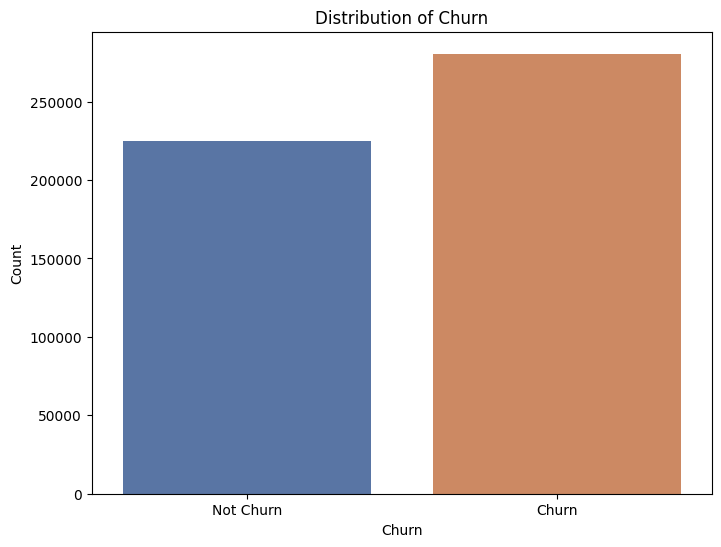

In [6]:
# Plot bar plot untuk distribusi churn dan tidak churn
plt.figure(figsize=(8, 6))
sns.countplot(data=costumer_churn, x='Churn', palette='deep')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

<Figure size 1000x600 with 0 Axes>

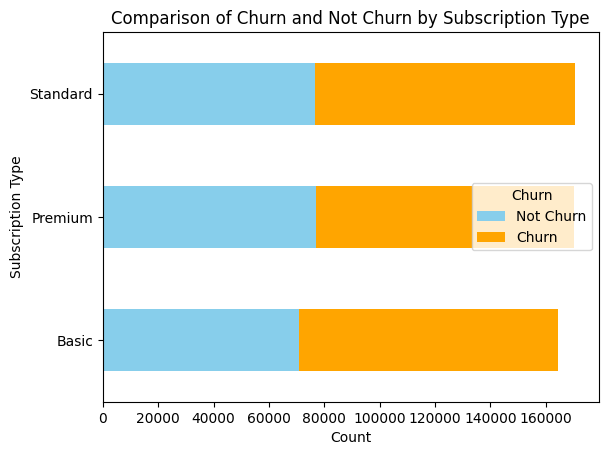

In [7]:
# Hitung jumlah churn dan tidak churn untuk setiap subscription type
subscription_churn_counts = costumer_churn.groupby(['Subscription Type', 'Churn']).size().unstack(fill_value=0)

# Visualisasi perbandingan churn dan tidak churn dalam satu bar plot
plt.figure(figsize=(10, 6))
subscription_churn_counts.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Count')
plt.ylabel('Subscription Type')
plt.title('Comparison of Churn and Not Churn by Subscription Type')
plt.legend(title='Churn', loc='center right', labels=['Not Churn', 'Churn'])
plt.show()

### Insigth Comparison of Churn and Not Churn by Subscription Type
Dari hasil visualisasinya antara churn dan tidak churn tiap subscription type ini memiliki kesamaan. dimana kegiata tipe member ini lebih condong terhadap data yang churn daripada tidak.

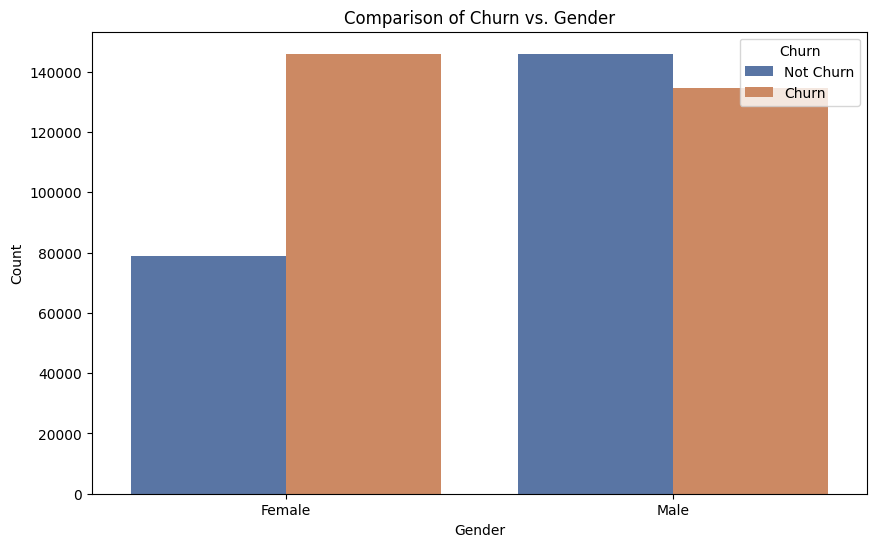

In [8]:
# Plot bar plot untuk membandingkan banyaknya churn dan tidak churn antara lelaki dan perempuan
plt.figure(figsize=(10, 6))
sns.countplot(data=costumer_churn, x='Gender', hue='Churn', palette='deep')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Churn vs. Gender')
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

### Insigth (Comparasion of Churn vs Gender)
dari visualisasi diatas dapat disimpulkan bahwa perempuan lebih banyak yang churn daripada lelaki, hal tersebut dapat dilihat dari perbandingan laki-laki dan perempuan yang memiliki distribusi yang sama antara churn pada perempuan dan tidak churn pada lelaki

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14672\413517415.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=costumer_churn, x='Churn', y='Total Spend', estimator=sum, ci=None, palette='deep')


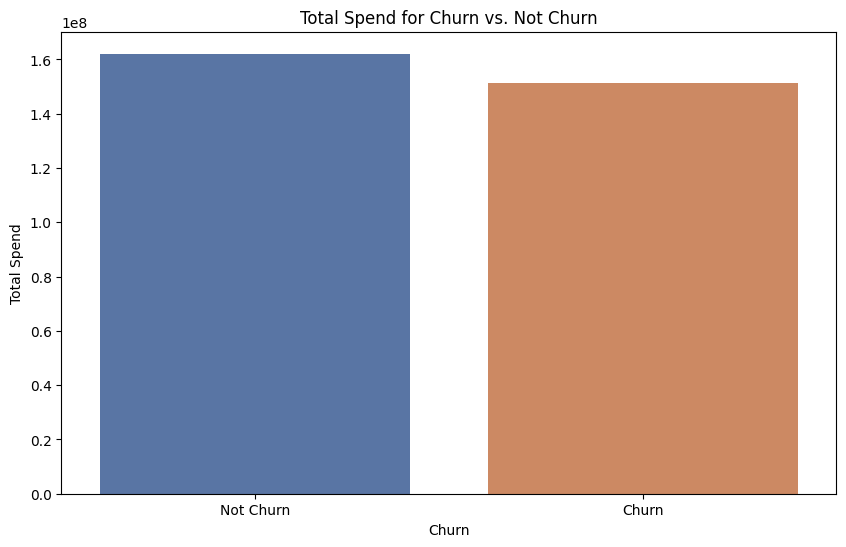

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=costumer_churn, x='Churn', y='Total Spend', estimator=sum, ci=None, palette='deep')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.title('Total Spend for Churn vs. Not Churn')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

### Insigth (Total Spend for Churn vs. Not Churn)
Dari hasil visualisasi diatas, dapat disimpulkan bahwa costumer yang tidak churn lebih banyak mengeluarkan uangnya daripada yang churn

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14672\378127973.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=costumer_churn, x='Churn', y='Usage Frequency', estimator=np.mean, ci=None, palette='deep')


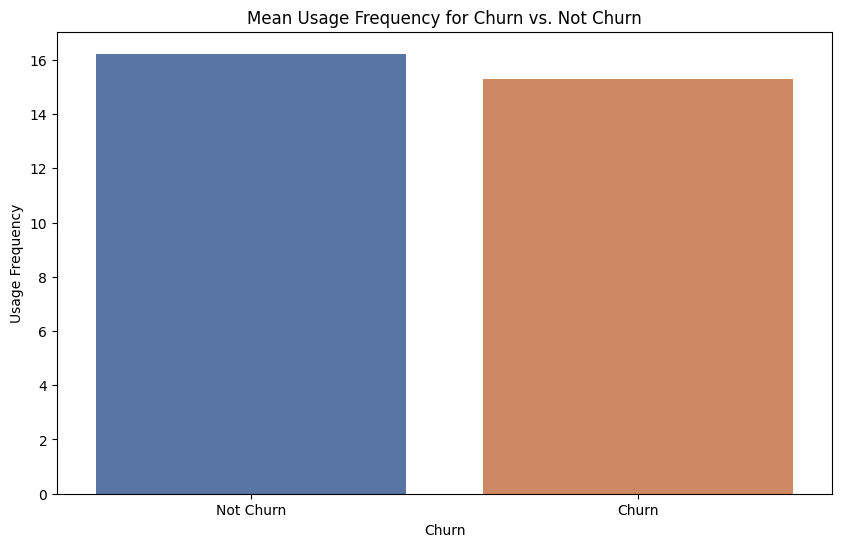

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=costumer_churn, x='Churn', y='Usage Frequency', estimator=np.mean, ci=None, palette='deep')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.title('Mean Usage Frequency for Churn vs. Not Churn')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

### Insigth (Mean Usage Frequency for Churn vs. Not Churn)
Dari hasil visualisasi diatas dapat diambil kesimpulan bahwa rata-rata costumer churn lebih sering menggunakan daripada churn. mauapun rata-ratanya ini tidak terlalu berbeda jauh



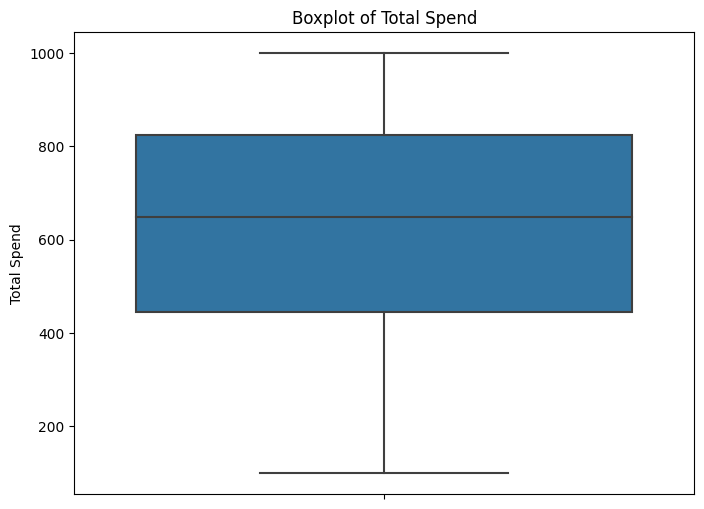

In [11]:
# Plot boxplot untuk kolom 'Total Spend'
plt.figure(figsize=(8, 6))
sns.boxplot(data=costumer_churn, y='Total Spend')
plt.ylabel('Total Spend')
plt.title('Boxplot of Total Spend')
plt.show()

### Insigth (Boxplot of Total Spend)
Pada Visualisasi boxplot didapatkan bahwa total spend dari costumer lebih condong memiliki negatively skewed yang artinya total yang dikeluarkan oleh costumer memiliki distribusi yang condong tinggi, yaitu kisaran 480an hingga 820an.

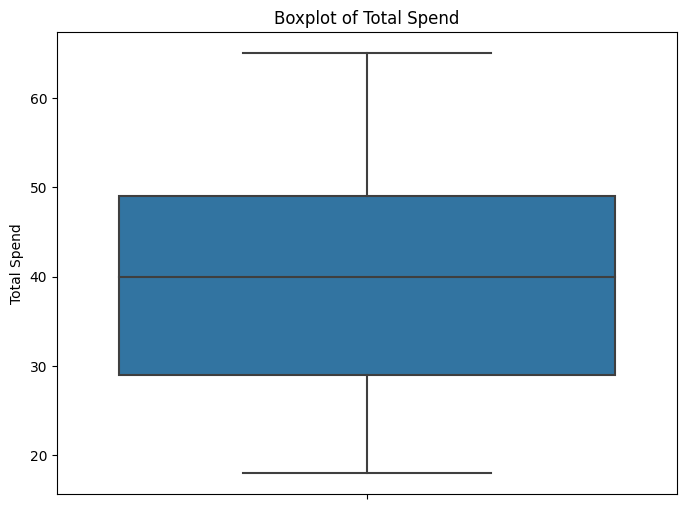

In [12]:
# Plot boxplot untuk kolom 'Total Spend'
plt.figure(figsize=(8, 6))
sns.boxplot(data=costumer_churn, y='Age')
plt.ylabel('Total Spend')
plt.title('Boxplot of Total Spend')
plt.show()

### Insigth (Boxplot of Age)
Pada Visualisasi boxplot didapatkan bahwa umur dari costumer hampir setara akan tetapi memang sedikit condong kebawah memiliki positively skewed yang artinya umur dari costumer terdistribusi diantara 29an hingga 48an

# Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
encoder = LabelEncoder()

# List kolom yang ingin diencode
columns_to_encode = ['Gender', 'Subscription Type', 'Contract Length', 'Churn']

# Melakukan encoding pada train_data
for column in columns_to_encode:
    costumer_churn[column] = encoder.fit_transform(costumer_churn[column])

In [15]:
# Drop the "Churn" column from the train dataset and assign it to X_train
X = costumer_churn.drop("Churn", axis=1)

# Extract the "Churn" column and assign it to y_train
y = costumer_churn["Churn"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
# Inisialisasi SimpleImputer dan StandardScaler
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Buat pipeline untuk menggabungkan SimpleImputer dan StandardScaler
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
])

# Proses imputasi dan scaling pada training set
X_train_scaled = pipeline.fit_transform(X_train)
# Proses imputasi dan scaling pada testing set
X_test_scaled = pipeline.transform(X_test)

# Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# Inisialisasi model Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

# Latih model pada training set
model_lr.fit(X_train_scaled, y_train)

# Lakukan prediksi pada testing set
y_pred = model_lr.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.82
Confusion Matrix:
[[36518  8463]
 [ 9856 46205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     44981
           1       0.85      0.82      0.83     56061

    accuracy                           0.82    101042
   macro avg       0.82      0.82      0.82    101042
weighted avg       0.82      0.82      0.82    101042



### Insigth
Berdasarkan hasil evaluasi model prediksi churn pada dataset gabungan, diperoleh akurasi sebesar 82%. Pada confusion matrix, terdapat 36,518 prediksi costumer yang tidak churn yang benar dan 9,856 prediksi costumer yang tidak churn namun sebenarnya churn. Sebaliknya, terdapat 8,463 prediksi costumer yang churn yang benar dan 46,205 prediksi costumer yang churn namun sebenarnya tidak churn.

Dari hasil classification report, precision untuk kelas tidak churn adalah sebesar 79%, yang menunjukkan bahwa dari semua costumer yang diprediksi tidak churn, 79% di antaranya memang benar-benar tidak churn. Sedangkan, precision untuk kelas churn adalah 85%, yang menunjukkan bahwa dari semua costumer yang diprediksi churn, 85% di antaranya benar-benar churn.

Dalam konteks prediksi churn, penting untuk meminimalkan jumlah costumer yang sebenarnya churn namun diprediksi tidak akan churn (False negative). Oleh karena itu, precision menjadi metrik evaluasi yang lebih penting bagi proyek ini. Dengan precision sebesar 85%, model telah berhasil meminimalkan jumlah costumer yang diprediksi salah sebagai tidak churn.

Namun, selain precision, juga perlu memperhatikan recall yang mengukur kemampuan model dalam menemukan costumer yang sebenarnya churn. Dengan recall sebesar 82%, model mampu mengidentifikasi 82% dari costumer yang sebenarnya churn.

Secara keseluruhan, model ini memberikan kinerja yang baik dengan akurasi 82%, precision dan recall yang seimbang, serta f1-score yang cukup tinggi. Namun, tetap penting untuk mengevaluasi berbagai aspek dan mempertimbangkan tujuan bisnis serta konteks spesifik dalam menentukan metrik evaluasi yang paling relevan untuk digunakan.

In [21]:
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data training
model_rf.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data testing
y_pred = model_rf.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.93
Confusion Matrix:
[[38454  6527]
 [   89 55972]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     44981
           1       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



## Insigth
Berdasarkan hasil evaluasi model prediksi churn costumer dengan dataset gabungan, diperoleh akurasi sebesar 93%. Pada confusion matrix, terdapat 38,454 prediksi costumer yang tidak churn yang benar dan 89 prediksi costumer yang tidak churn namun sebenarnya churn. Sebaliknya, terdapat 55,972 prediksi costumer yang churn yang benar dan 6,527 prediksi costumer yang churn namun sebenarnya tidak churn.

Dari hasil classification report, precision untuk kelas tidak churn adalah sebesar 100%, yang menunjukkan bahwa dari semua costumer yang diprediksi tidak churn, 100% di antaranya memang benar-benar tidak churn. Namun, recall untuk kelas tidak churn adalah 85%, yang menunjukkan bahwa dari semua costumer yang sebenarnya tidak churn, model berhasil memprediksi 85% dari mereka dengan benar.

Karena fokus kita adalah untuk meminimalkan jumlah costumer yang sebenarnya churn namun diprediksi tidak akan churn, maka recall menjadi metrik evaluasi yang lebih penting bagi proyek ini. Dengan recall sebesar 90%, model telah berhasil memprediksi hampir semua costumer yang sebenarnya churn dengan benar.

Namun, tetap perlu diperhatikan bahwa akurasi, precision, recall, dan F1-score adalah indikator kinerja yang penting dan harus dijadikan bahan pertimbangan bersama untuk mengevaluasi keberhasilan model. Dengan akurasi sebesar 93% dan F1-score yang tinggi, kita dapat menyimpulkan bahwa model prediksi churn ini cukup baik dan dapat diandalkan untuk memprediksi perilaku churn costumer. Selain itu, recall yang tinggi menunjukkan bahwa model berhasil mengidentifikasi sebagian besar costumer yang berpotensi churn dengan tepat.